In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


# a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

#### From the above visualization the mean and stantard deviation of order_amount is absurdly high considering the fact that the price of the sneakers is relatively affordable, and also there is a huge difference between the maximum value(order_amount) and other values.

<AxesSubplot:>

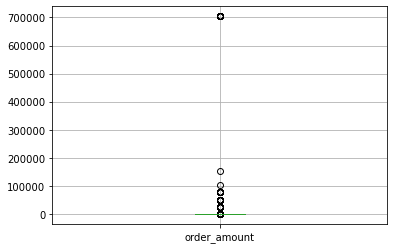

In [5]:
df.boxplot(column='order_amount')

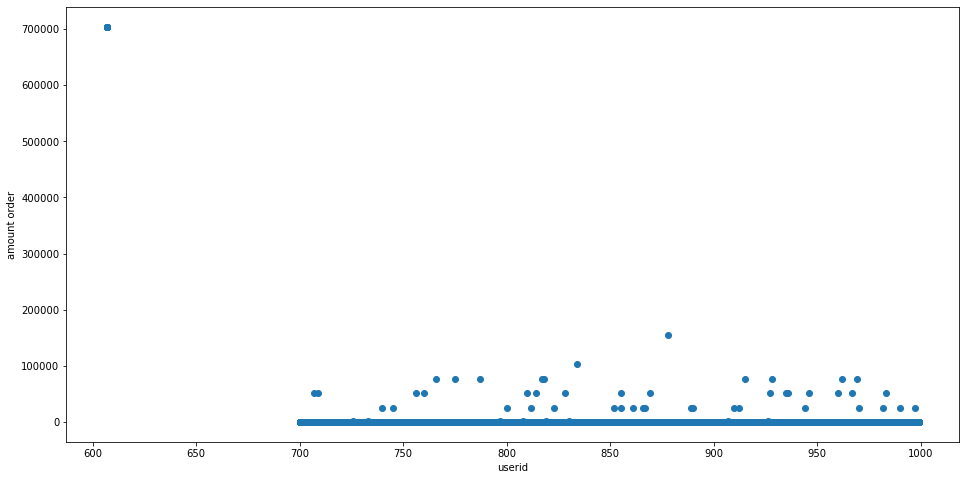

In [6]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['user_id'], df['order_amount'])
ax.set_xlabel('userid')
ax.set_ylabel('amount order')
plt.show()

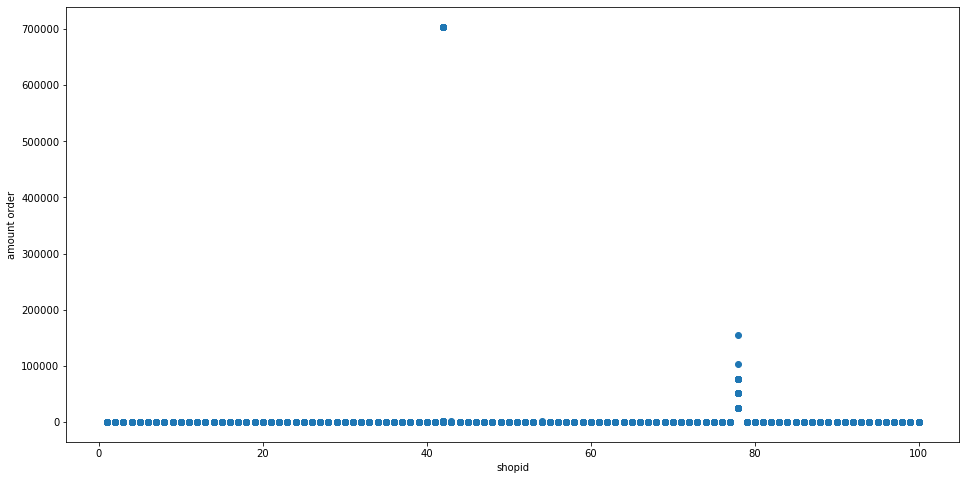

In [7]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['shop_id'], df['order_amount'])
ax.set_xlabel('shopid')
ax.set_ylabel('amount order')
plt.show()

#### With further EDA we can see that there are indeed some outliers so a better way to evaluate the data would be to deal with the outliers and one of the ways to handle outliers in by plotting only values that are the median +/- 1.5 times the interquartile range.

<AxesSubplot:>

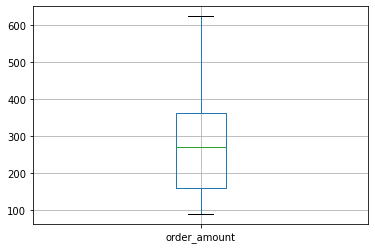

In [13]:
q1 = df.order_amount.quantile(q=0.25)
q2 = df.order_amount.quantile(q=0.5)
q3 = df.order_amount.quantile(q=0.75)
IQR = q3 - q1

df_quantile = df[(df.order_amount < q2 + IQR * 1.5) & (df.order_amount > q2 - IQR * 1.5)]
df_quantile.boxplot(column='order_amount')

In [14]:
df_quantile.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4738.000000,4738.000000,4738.000000,4738.000000,4738.00000
mean,2500.866399,49.770367,850.325876,283.814268,1.89848
std,1444.266056,29.149727,86.802461,132.061996,0.86278
min,1.000000,1.000000,700.000000,90.000000,1.00000
25%,1247.250000,24.000000,776.000000,161.000000,1.00000
50%,2502.500000,50.000000,851.000000,272.000000,2.00000
75%,3755.750000,74.000000,926.000000,362.000000,2.00000
max,5000.000000,100.000000,999.000000,624.000000,5.00000


### b. What metric would you report for this dataset?
I would report the median value given that it is more robust against outliers.

### c. What is its value?

 From the above analysis the value is $283. 